#Business Understanding

The goal of this project is to predict the condition of water wells in Tanzania to help stakeholders—such as NGOs, government bodies, and water management organizations—optimize resource allocation, maintenance efforts, and future well construction planning. This notebook presents our approach to addressing water access challenges in Tanzania through predictive modeling.

#Problem Statement

Tanzania, a developing country with over 57 million people, struggles to provide clean and accessible water. Many water wells are installed across the country, but some are in need of repair or have completely failed. The classification of these wells into functional, needs repair, or non-functional helps decision-makers take action where it's needed most. I will build a classification model to identify which water wells require repairs, enabling proactive maintenance and ensuring reliable access to clean drinking water.

#Objectives

1. Proactive Maintenance & Resource Allocation
2. Prioritize Repairs for High-Risk & Functional-But-Vulnerable Wells
3. Identify Key Factors Influencing Water Pump Failures
4. Strategic Planning for New Wells
5. Support Government & Stakeholders in Water Crisis Management

#Data Understanding

The target variable categorizes water points into three groups:

1. Functional – The water point is fully operational with no repairs needed.
2. Functional but needs repair – The water point is working but requires maintenance.
3. Non-functional – The water point is not operational.


#Import Datasets

#Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:

# Load datasets
train_values = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_values = pd.read_csv("test_set_values.csv")

data = train_values.merge(train_labels, on='id')

In [27]:
# Checking the overview of the data
def data_summary(df):
    print(df.info())


data_summary(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [28]:
# Checking a brief summary of the data
data.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [29]:
# Checking any missing values
print(data.isnull().sum())

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

#Data Cleaning

##Correct formats

In [30]:
# Confirming the format of individual columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

##Handling NAs

In [31]:
# Dealing with the missing values
data.fillna(method='ffill', inplace=True)

<ipython-input-31-c0aa6b171d31>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-31-c0aa6b171d31>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(method='ffill', inplace=True)


In [32]:
#Confirming whether they are sorted
data.isna().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,0
gps_height,0
installer,0
longitude,0
latitude,0
wpt_name,0
num_private,0


##Handling duplicates

In [33]:
# Dropping unneccesary columns
drop_columns = ["region_code", "district_code", "quantity_group", "source_type", "num_private", "waterpoint_type"]
data = data.drop(drop_columns, axis =1)


In [34]:
#GConfirm the unique values for each column
unique_counts = data.nunique()

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59400 non-null  object 
 11  region                 59400 non-null  object 
 12  lga                    59400 non-null  object 
 13  ward                   59400 non-null  object 
 14  population             59400 non-null  int64  
 15  pu

#EDA

##Univariate Analysis

In [36]:
#Get unique values for status group of the pumps

label_vc = data['status_group'].value_counts()
label_vc

,count
status_group,
functional,32259
non functional,22824
functional needs repair,4317


<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


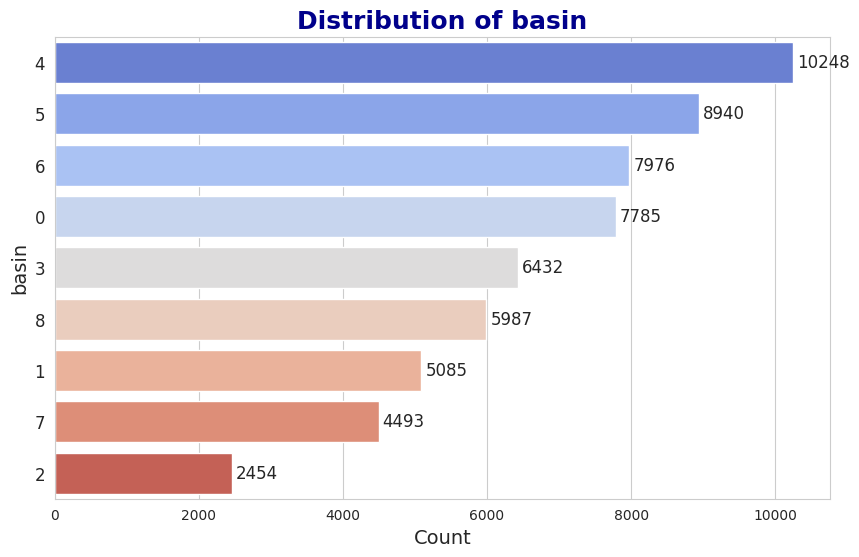

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


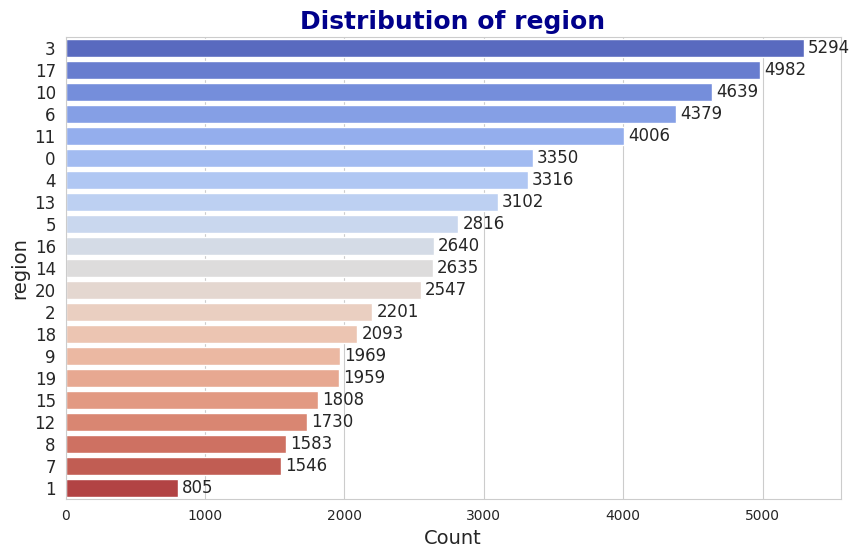

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


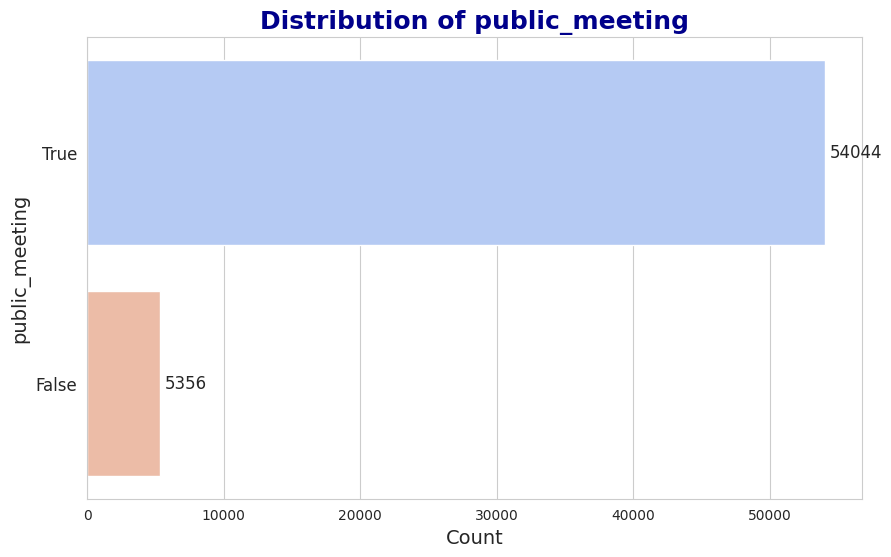

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


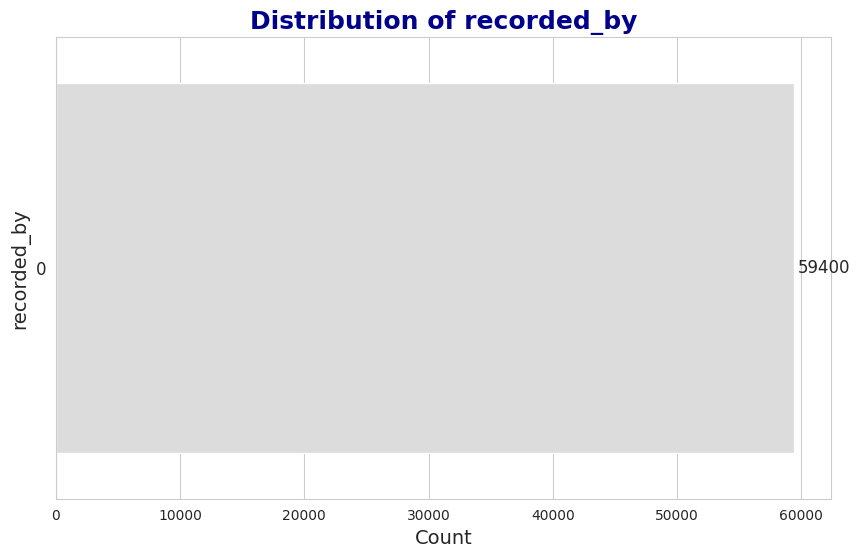

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


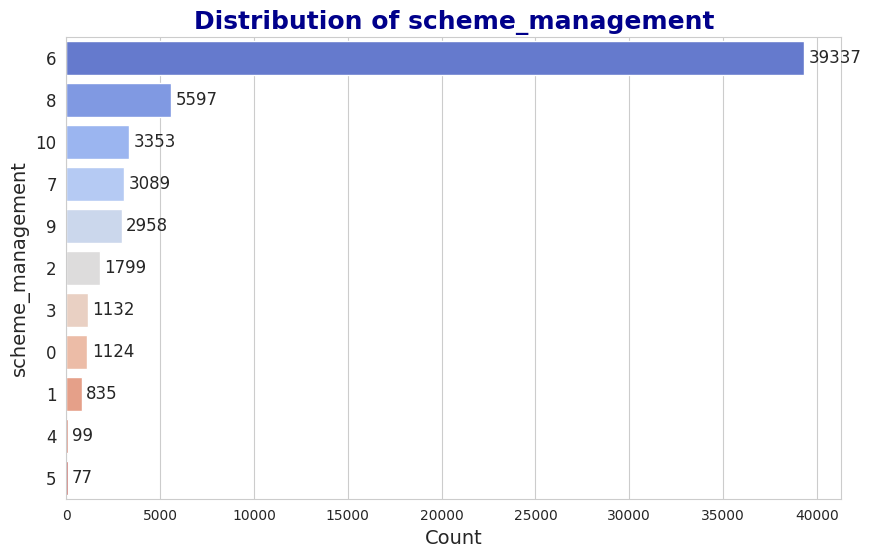

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


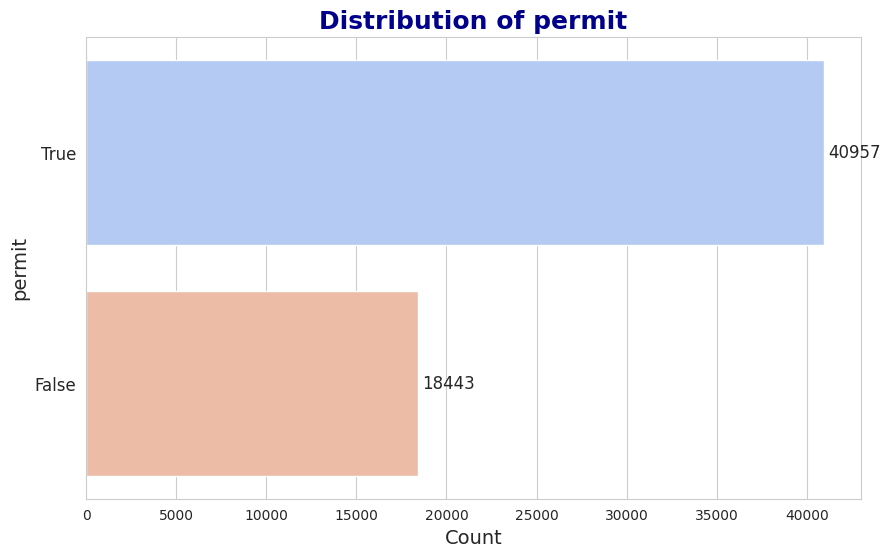

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


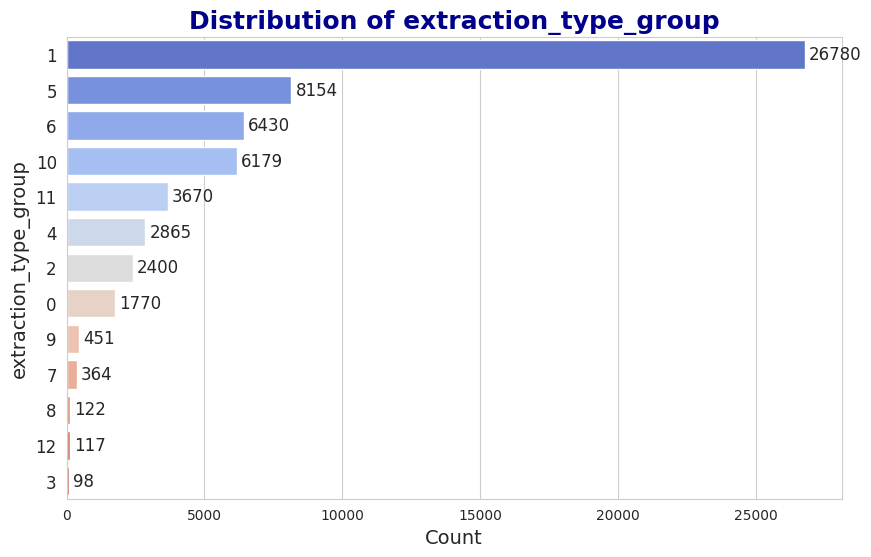

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


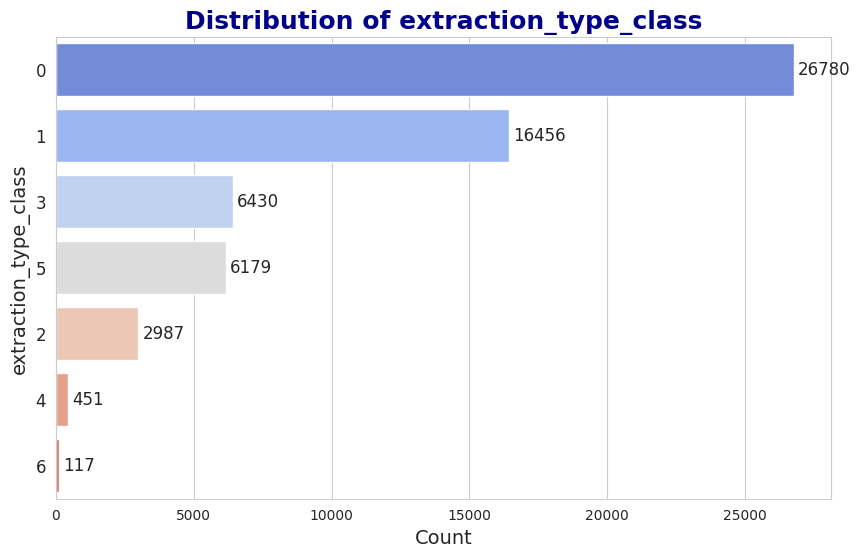

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


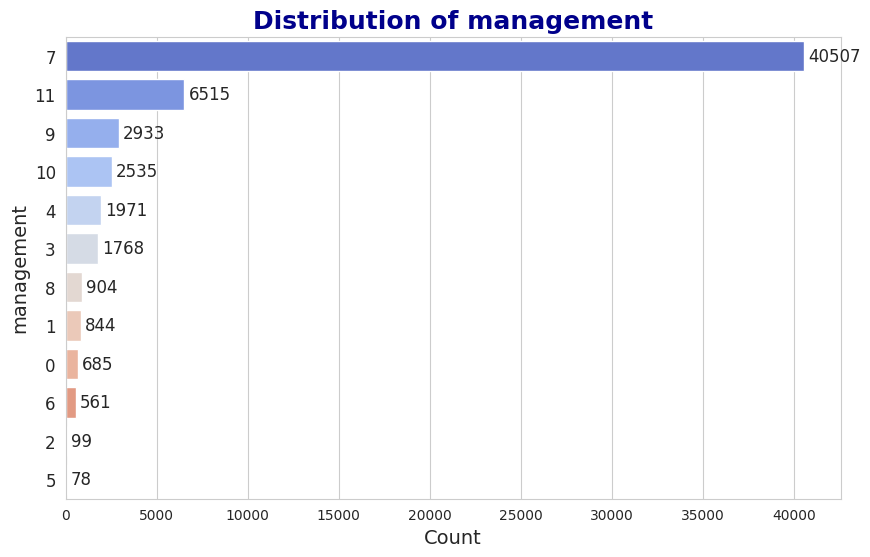

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


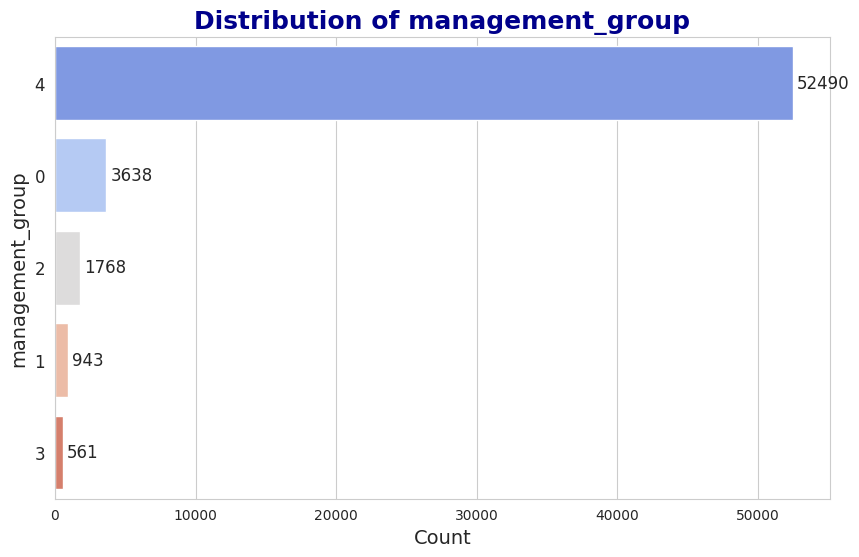

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


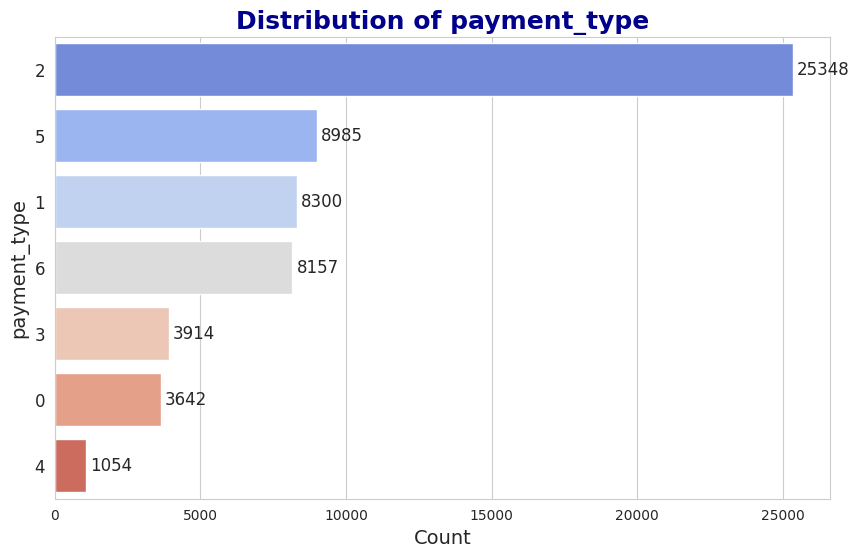

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


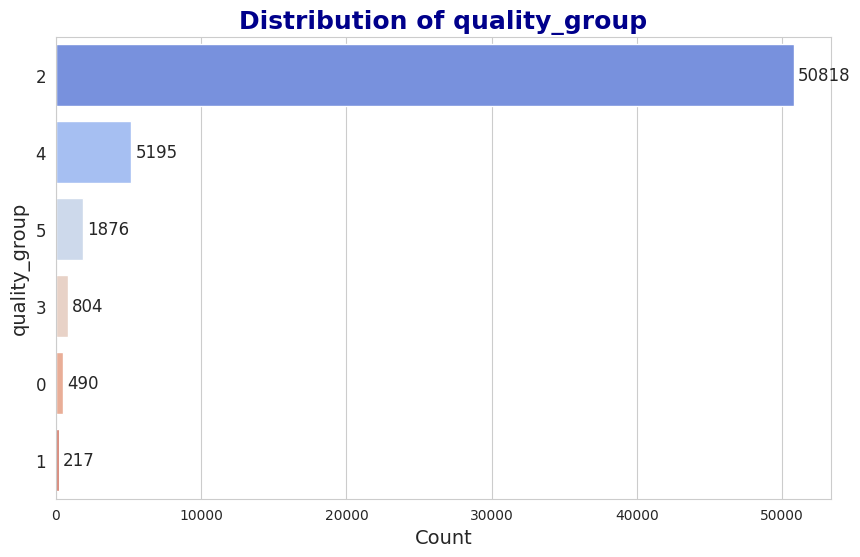

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


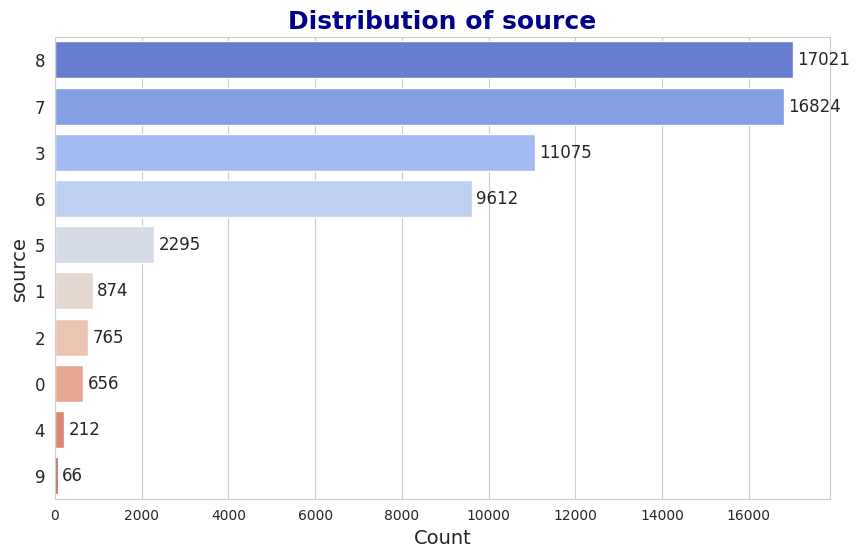

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


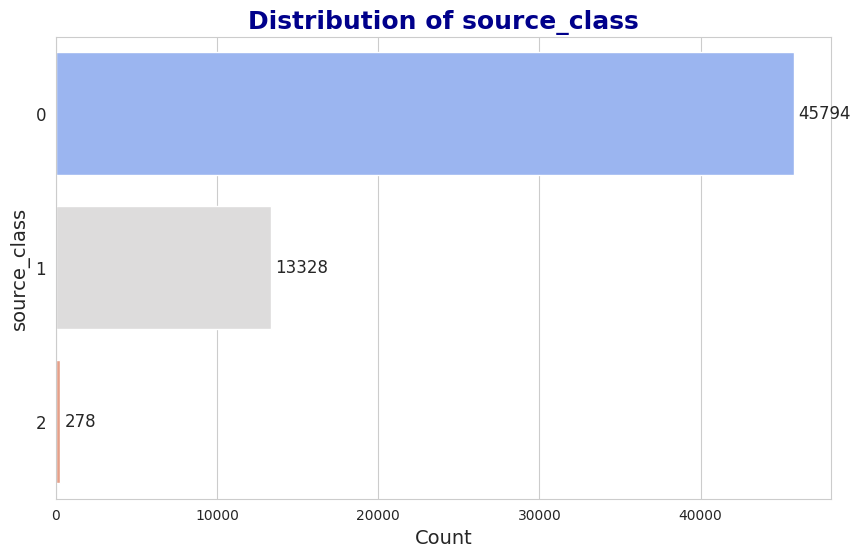

<ipython-input-65-7251bd9d3019>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)


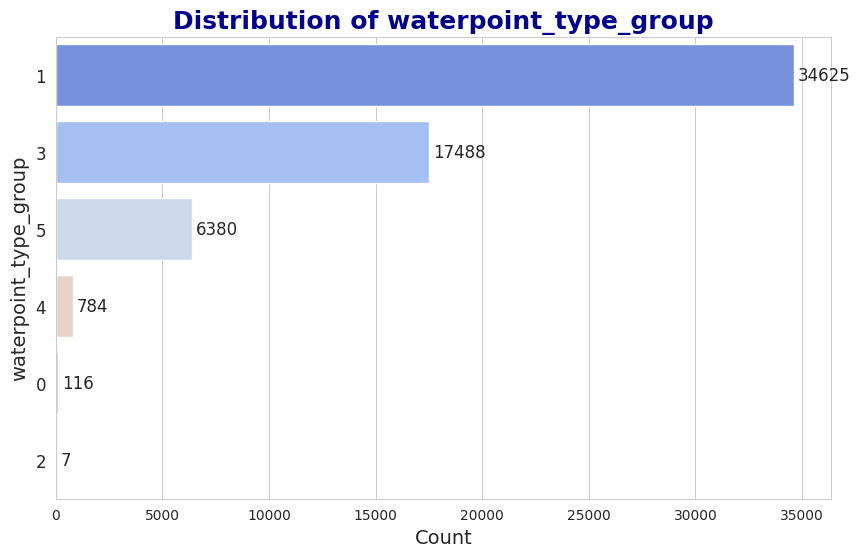

In [65]:
# checking at the distribution of object data types

categorical = ['basin', 'region',
         'public_meeting', 'recorded_by',
       'scheme_management', 'permit',
       'extraction_type_group', 'extraction_type_class',
       'management', 'management_group',  'payment_type',
        'quality_group',
       'source', 'source_class',
       'waterpoint_type_group']
categorical

sns.set_style("whitegrid")

for col in categorical:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=col, data=data, palette="coolwarm", order=data[col].value_counts().index)
    for container in ax.containers:
        ax.bar_label(container, fmt="%d", label_type="edge", fontsize=12, padding=3)

    plt.title(f"Distribution of {col}", fontsize=18, fontweight="bold", color="darkblue")
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.yticks(fontsize=12)

    plt.show()


##Bivariate Analysis

In [39]:
# Getting the maximum and minimum values for latitude and longitude
BBox = ((
    data[data['longitude']!=0].longitude.min(),
    data.longitude.max(),
    data.latitude.min(),
    data.latitude.max()
))
BBox


(29.6071219, 40.34519307, -11.64944018, -2e-08)

Majority of the water wells are managed by communities

##Multivariate Analysis


                         id  amount_tsh  gps_height  longitude  latitude  \
id                 1.000000   -0.005321   -0.004692  -0.001348  0.001718   
amount_tsh        -0.005321    1.000000    0.076650   0.022134 -0.052670   
gps_height        -0.004692    0.076650    1.000000   0.149155 -0.035751   
longitude         -0.001348    0.022134    0.149155   1.000000 -0.425802   
latitude           0.001718   -0.052670   -0.035751  -0.425802  1.000000   
num_private       -0.002629    0.002944    0.007237   0.023873  0.006837   
region_code       -0.003028   -0.026813   -0.183521   0.034197 -0.221018   
district_code     -0.003044   -0.023599   -0.171233   0.151398 -0.201020   
population        -0.002813    0.016288    0.135003   0.086590 -0.022152   
construction_year -0.002082    0.067915    0.658727   0.396732 -0.245278   

                   num_private  region_code  district_code  population  \
id                   -0.002629    -0.003028      -0.003044   -0.002813   
amount_tsh     

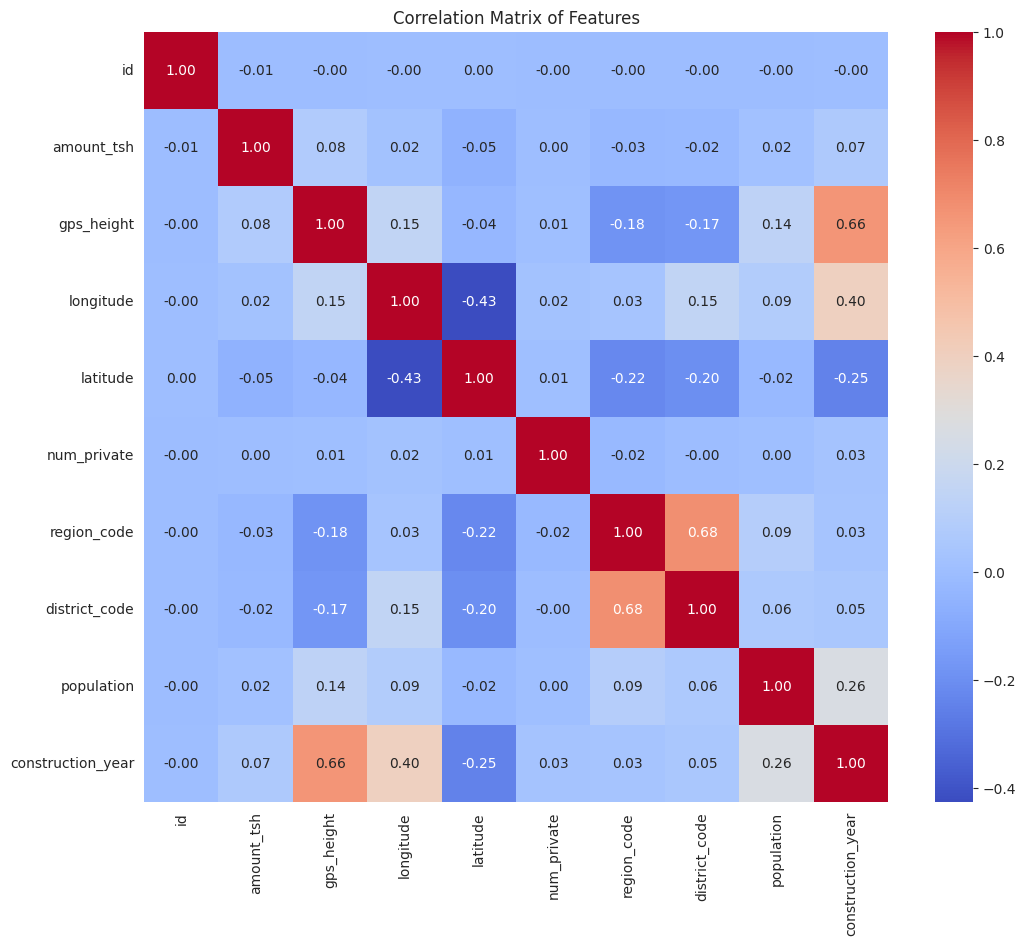

In [42]:
# Calculating the correlation matrix
correlation_matrix = train_values.select_dtypes('number').corr()
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

#Preprocessing

##Encoding

In [43]:
# Encoding the categorical variables
encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [44]:
# Splitting features and target
X = data.drop(columns=['id', 'status_group'])
y = data['status_group']



In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
for col in categorical_columns:
    print(f"Column: {col}")
    print(data[col].unique())
    print()


Column: date_recorded
[171 216 144  21 268 169  35  71  84 320 133 128  41 174  49 324 290 351
 278 137 147 115  64  85  13   7 266 213 176 191 175 182 165 139 202 271
 199 116  61 167 294   6 180  51 155 283 243 136 307 289 298 269 138 287
 321  14 189 254  10 159  27 154 212 209 148 327 207  52 183 210 172  45
 328 352 226   8  11  20 130  67 118 146 124 126 277 217 267 272 248 225
  58 143  37 120  66 274 230 177  18  68 141 188 309 151  16  50 231 152
 142 235  46  25 205 306 201 279 156 300 221 179 218 303 350 123 241 296
 227 229 163 196 150   9  36 286 325 276 170 173 273 206  91 244  43 192
 242 158 187 246  42 181 260 204  57 270  38 285 326  39 184 117  22  28
  54  76 114 299 178 288 135 125 308 122 132  19 247 312 194  48 224 140
 134 249 203 195 162 256  89 193 185 211  55 262 311 157 280 281 190 310
 284 168 208 111 197 219  15  88  47  69 233  78 301 314  70 145 198 161
 101 119   5  65 282  56  44 341  60 186  93 121  53 164 293 295 100 316
 297 250  63 215 275  75 149 

##Scalling

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns

non_numeric_cols = X_train.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    try:
        X_train[col] = pd.to_datetime(X_train[col])
        X_test[col] = pd.to_datetime(X_test[col])
        ref_date = pd.Timestamp("2000-01-01")
        X_train[col] = (X_train[col] - ref_date).dt.days
        X_test[col] = (X_test[col] - ref_date).dt.days
    except Exception:
        X_train = X_train.drop(columns=[col])
        X_test = X_test.drop(columns=[col])

X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [56]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
data.construction_year.unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965])

In [58]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type_group,status_group
0,69572,6000.0,171,1368,1390,1518,34.938093,-9.856322,37398,1,...,4,2,0,6,2,1,8,0,1,0
1,8776,0.0,216,469,1399,545,34.698766,-2.147466,37194,4,...,4,0,2,6,2,2,5,1,1,0
2,34310,25.0,144,825,686,2048,37.460664,-3.821329,14572,5,...,4,4,5,6,2,1,0,1,1,0
3,67743,0.0,21,1740,263,1852,38.486161,-11.155298,37284,7,...,4,0,2,6,2,0,3,0,1,2
4,19728,0.0,268,20,0,119,31.130847,-1.825359,35528,4,...,1,0,2,6,2,3,5,1,1,0


#Modelling

In [59]:
# Load Models Dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naïve Bayes": GaussianNB()
}


In [60]:
# Training and Evaluating Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.6386
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      6457
           1       0.16      0.00      0.01       851
           2       0.64      0.49      0.56      4572

    accuracy                           0.64     11880
   macro avg       0.48      0.44      0.43     11880
weighted avg       0.61      0.64      0.61     11880

Decision Tree Accuracy: 0.7405
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      6457
           1       0.33      0.35      0.34       851
           2       0.75      0.76      0.75      4572

    accuracy                           0.74     11880
   macro avg       0.62      0.63      0.63     11880
weighted avg       0.74      0.74      0.74     11880

Random Forest Accuracy: 0.8120
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6457
           1       0.56      0

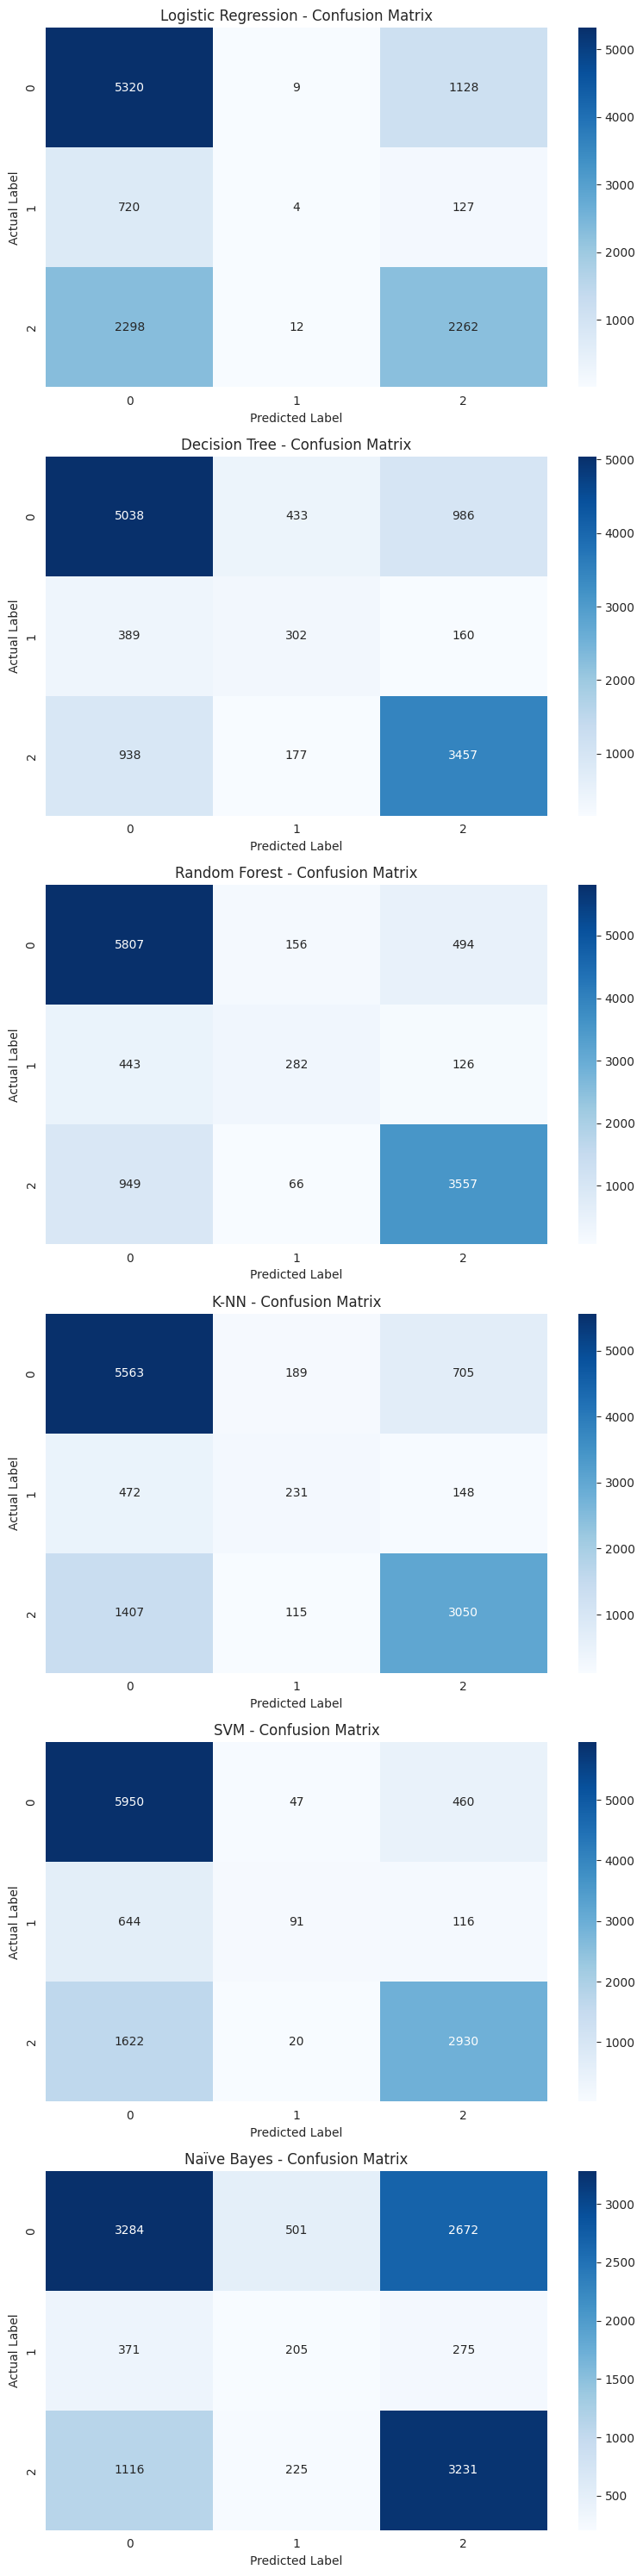

<ipython-input-61-326892c78896>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


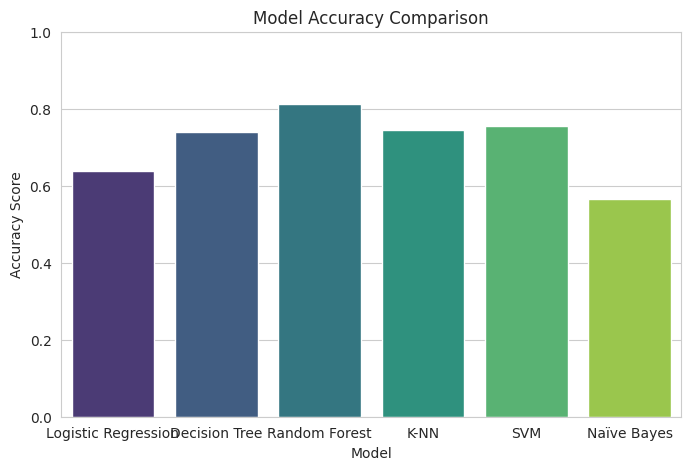

In [61]:
# Create subplots for confusion matrices
fig, axes = plt.subplots(len(models), 1, figsize=(8, len(models) * 5))

for i, (name, model) in enumerate(models.items()):
    # Predict
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("Actual Label")

plt.tight_layout()
plt.show()

# Accuracy Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()



#Model Evaluation

**Random Forest performs the best overall**:

* Highest accuracy (0.8114).
* Highest macro-average precision (0.74), recall (0.67), and F1-score (0.69).
* Strong performance across all classes, especially for class 0 and class 2.

**Decision Tree and K-NN are decent alternatives**:

1. Both achieve accuracy > 0.73.
1. Decision Tree has better macro-average recall (0.63) compared to K-NN (0.60).
2. K-NN has slightly better precision (0.66) compared to Decision Tree (0.62).

**SVM performs well but struggles with class** 1:

1.   High accuracy (0.7562) and precision (0.71).
2.  Poor recall for class 1 (0.11), indicating it struggles to identify this class.

**Logistic Regression and Naïve Bayes underperform**:

1.   Logistic Regression has the lowest macro-average F1-score (0.43).
2.   Naïve Bayes has the lowest accuracy (0.5859) and struggles with precision and recall for all classes.



###Hyperparameter Tuning

##Hyperparameter Tuning for Random Forest

In [62]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 100],
    'max_depth': [None, 10, 30]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
gs_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", gs_rf.best_params_)
print("Best Score:", gs_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 30, 'n_estimators': 100}
Best Score: 0.8009259259259259


##Hyperparameter Tuning for Decision Tree

In [63]:
# Hyperparameter Tuning for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy')
gs_dt.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", gs_dt.best_params_)
print("Best Score:", gs_dt.best_score_)

Best Parameters for Decision Tree: {'max_depth': 15, 'min_samples_split': 10}
Best Score: 0.7535984848484848


##Hyperparameter Tuning for Naïve Bayes

In [64]:
# Hyperparameter Tuning for Naïve Bayes (var_smoothing)
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=3, scoring='accuracy')
gs_nb.fit(X_train, y_train)
print("Best Parameters for Naïve Bayes:", gs_nb.best_params_)
print("Best Score:", gs_nb.best_score_)


Best Parameters for Naïve Bayes: {'var_smoothing': 1.0}
Best Score: 0.5905934343434344


#Conclusion & Recommendation

1) **The best model evaluation**:  

*   Random Forest should be used as it consistently outperforms the other models across

2) **Improve the Class 1 Performance**:

1.   Investigate class imbalance. If class 1 is underrepresented, consider techniques like oversampling or class weighting.
2.   Experiment with hyperparameter tuning for better performance on this class.

3) **Alternative Models to consider**:

1.   If interpretability is important, Decision Tree or Logistic Regression should be considered.
2.   If computational efficiency is a concidered, K-NN or SVM are reasonable alternatives.
